***Color manual***

<div class="alert alert-block alert-success">
<b>Green - Libraries</b>
</div>

<div class="alert alert-block alert-info">
<b>Blue - Information</b>
</div>

<div class="alert alert-block alert-danger">
<b>Red - Problems</b>
</div>

***

<div class="alert alert-block alert-success">
<b>Import libraries</b>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
sns.set_style("white")
%matplotlib inline

<div class="alert alert-block alert-info">
<b>Load the Data, delete columns, set index and info about data</b>
</div>

In [2]:
#Alternative method to load data
#path =r"C:\Users\Sif\Documents\kaggle Data\population-time-series-data\POP.csv"
#df = pd.read_csv(path)

df = pd.read_csv('POP.csv')
df['date'] = pd.to_datetime(df.date)
df.set_index('date', inplace = True)
df.sort_index(inplace = True)
df.drop(df.columns[[0,2]], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 816 entries, 1952-01-01 to 2019-12-01
Data columns (total 1 columns):
value    816 non-null float64
dtypes: float64(1)
memory usage: 12.8 KB


<div class="alert alert-block alert-info">
<b>Plot all years</b>
</div>

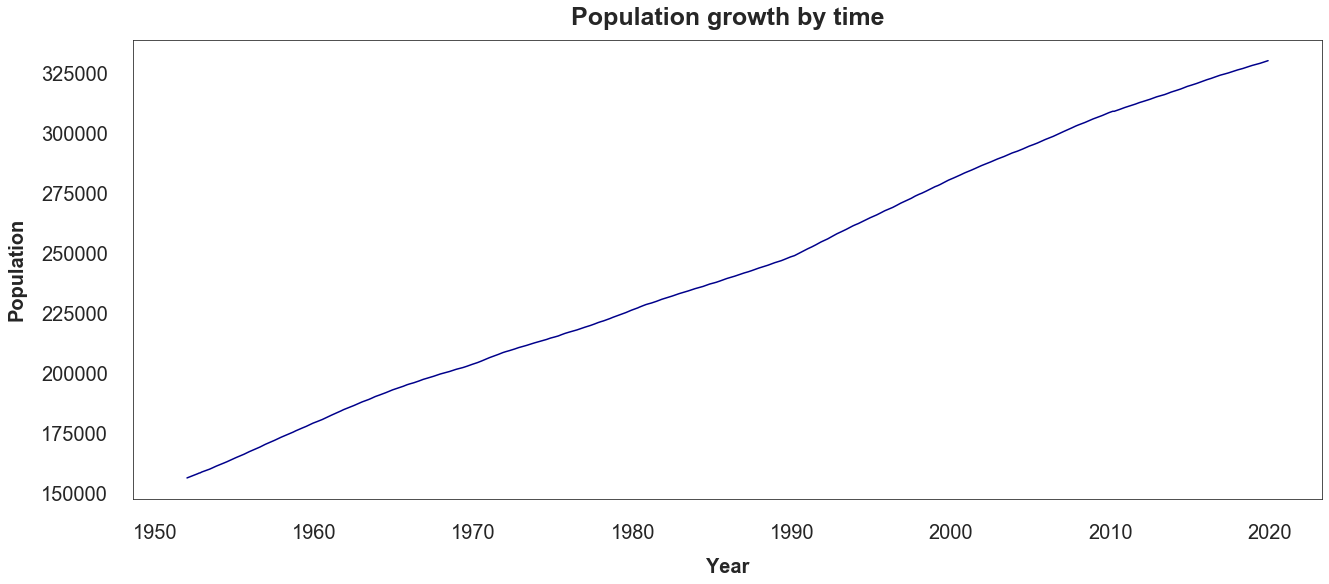

In [16]:
#plt.gcf().autofmt_xdate() to format date

plt.figure(figsize = (20,10))
plt.rc('font', weight = 'normal')
plt.title('Population growth by time', weight = 'bold', fontsize = 25, pad= 15)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Population', weight = 'bold', fontsize = 20,  labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10,)                                
plt.tight_layout(pad = 5)                                               
plt.rc('font', size = 15)
plt.plot(df['value'], color = 'darkblue')
plt.show()

<div class="alert alert-block alert-info">
<b>Pick a year to plot</b>
</div>

Type the year you want to plot from 1952 to 2019: 2000


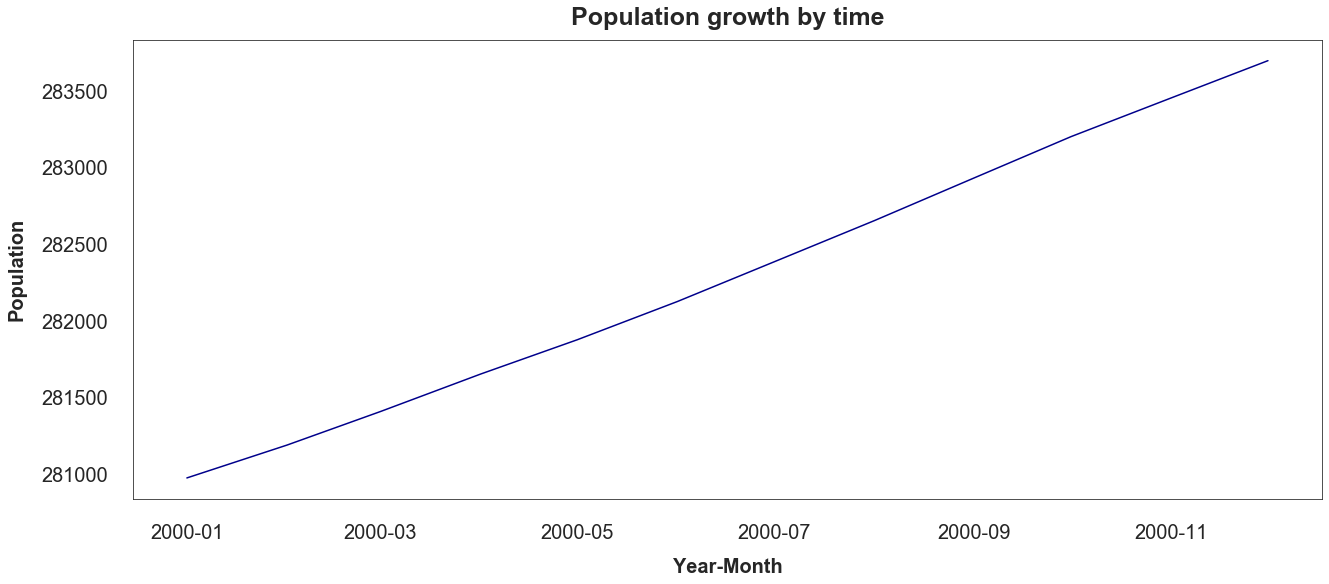

In [4]:
year = int(input("Type the year you want to plot from 1952 to 2019: "))
if year > 1951 and year < 2020:
    plt.figure(figsize = (20,10))
    plt.rc('font', weight = 'normal')
    plt.title('Population growth by time', weight = 'bold', fontsize = 25, pad= 15)
    plt.xlabel('Year-Month', weight = 'bold', fontsize = 20, labelpad = 15)
    plt.ylabel('Population', weight = 'bold', fontsize = 20,  labelpad = 15)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(axis = 'both', pad = 15, size = 10,)                                
    plt.tight_layout(pad = 5)                                               
    plt.rc('font', size = 15)                                                                                      
    dfyear1 = df[df.index.year == year]
    plt.plot(dfyear1, color = 'darkblue')
    plt.show()
else:
    print("Run again and type a valid year")

<div class="alert alert-block alert-info">
<b>Pick multiple years to plot</b>
</div>

Type the year you wanna start from 1952 to 2019: 2018
Type the year you wanna stop from 1952 to 2019: 2019


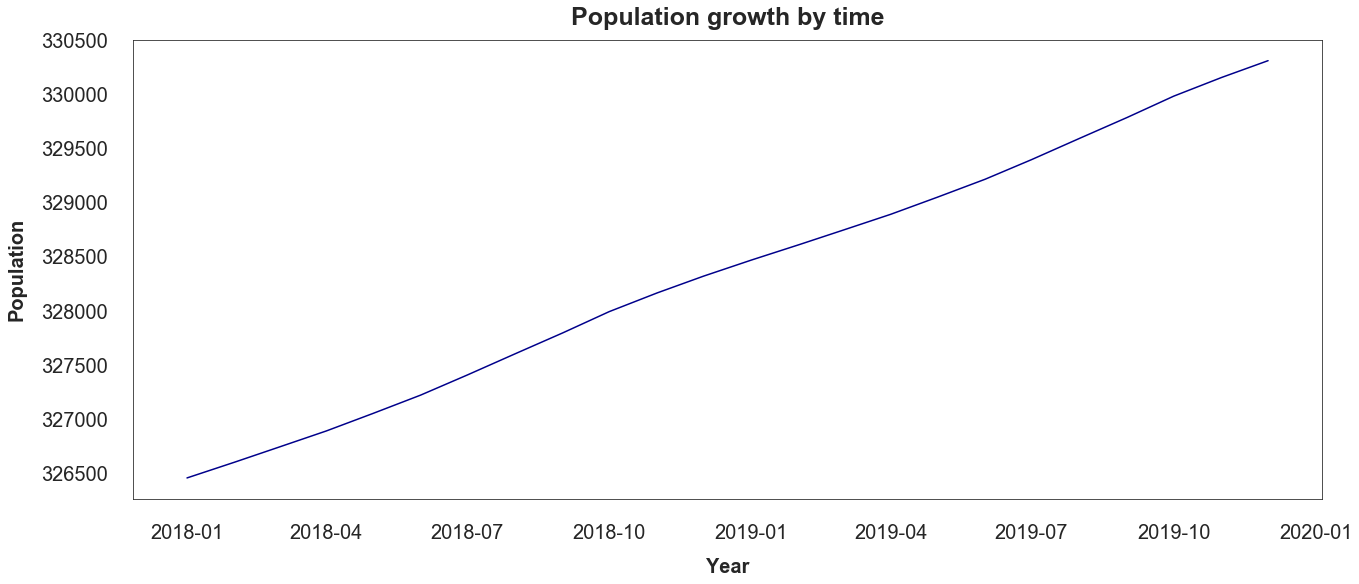

In [5]:
year_s = int(input("Type the year you wanna start from 1952 to 2019: "))
year_p = int(input("Type the year you wanna stop from 1952 to 2019: "))
if year_s > 1951 and year_s < 2020 and year_p > 1951 and year_p < 2020:
    plt.figure(figsize = (20,10))
    plt.rc('font', weight = 'normal')
    plt.title('Population growth by time', weight = 'bold', fontsize = 25, pad= 15)
    plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 15)
    plt.ylabel('Population', weight = 'bold', fontsize = 20, labelpad = 15)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(axis = 'both', pad = 15, size = 10,)                                  
    plt.tight_layout(pad = 5)                                               
    plt.rc('font', size = 15)
    dfyear2 = df[(df.index.year >= year_s) & (df.index.year <= year_p)]
    plt.plot(dfyear2, color = 'darkblue')
    plt.show()
else:
    print("Run again and type a valid year(s)")

<div class="alert alert-block alert-info">
<b>Check if the time series of normal values are stationary</b>
</div>

In [6]:
A = df['value'].values
result = adfuller(A)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]['5%']:
    print ('Reject Ho - Time Series is Stationary')
else:
    print ('Failed to Reject Ho - Time Series is Non-Stationary')

ADF Statistic: -0.665317
p-value: 0.855530
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Failed to Reject Ho - Time Series is Non-Stationary


<div class="alert alert-block alert-info">
<b>Create diff values and erase past missing ones</b>
</div>

In [7]:
#this fuction -> df['value'].diff() is equal to diff = df['value'] - df['value'].shift()
#So does ._get_numeric_data().dropna() works on both

diff = df['value'] - df['value'].shift()
diff_fix = diff._get_numeric_data().dropna()

diff1 = df['value'].diff()
diff_fix1 = diff1._get_numeric_data().dropna()

<div class="alert alert-block alert-info">
<b>Check if the time series of diff values are stationary</b>
</div>

In [8]:
B = diff_fix
result = adfuller(B)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]['5%']:
    print ('Reject Ho - Time Series is Stationary')
else:
    print ('Failed to Reject Ho - Time Series is Non-Stationary')

ADF Statistic: -2.009895
p-value: 0.282251
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Failed to Reject Ho - Time Series is Non-Stationary


<div class="alert alert-block alert-info">
<b>Data results summary</b>
</div>

In [9]:
Y = diff_fix[~np.isnan(diff_fix)]
ts_values_orig = df['value'].values
ts_values = ts_values_orig[:-1]
X = sm.add_constant(ts_values)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.242
Date:                Sun, 22 Mar 2020   Prob (F-statistic):              0.135
Time:                        19:17:54   Log-Likelihood:                -4237.1
No. Observations:                 815   AIC:                             8478.
Df Residuals:                     813   BIC:                             8488.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        224.6192      7.585     29.614      0.0

<div class="alert alert-block alert-info">
<b>Plot Autocorrelation and Partial Autocorrelation of normal and diff values</b>
</div>

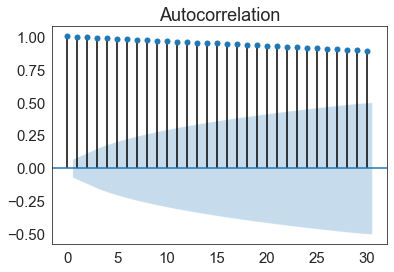

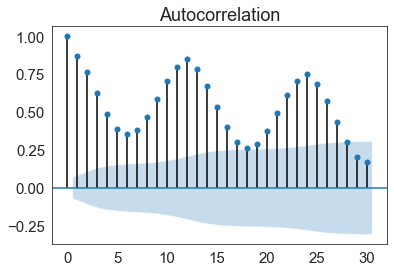

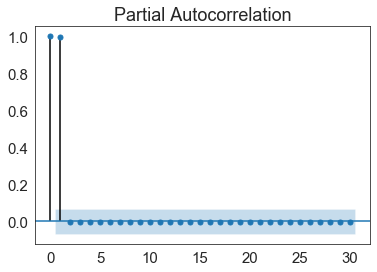

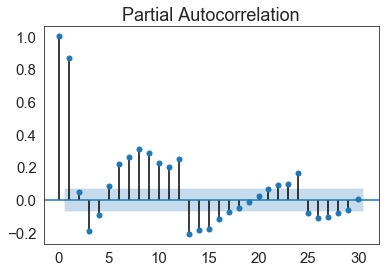

In [10]:
acf = plot_acf(df['value'])
acf_diff = plot_acf(diff_fix)
pacf = plot_pacf(df['value'])
pacf_diff = pacf = plot_pacf(diff_fix)
plt.show()

<div class="alert alert-block alert-info">
<b>Plot Seasonality</b>
</div>

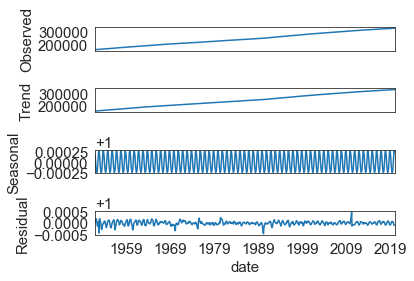

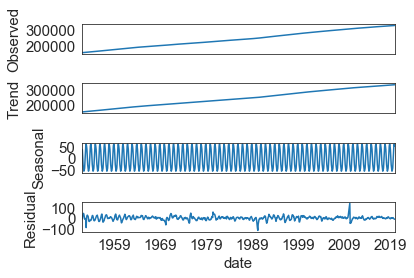

In [11]:
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
mul_plot = result_mul.plot()

result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')
add_plot = result_add.plot()

plt.show()

<div class="alert alert-block alert-info">
<b>Moving average plot</b>
</div>

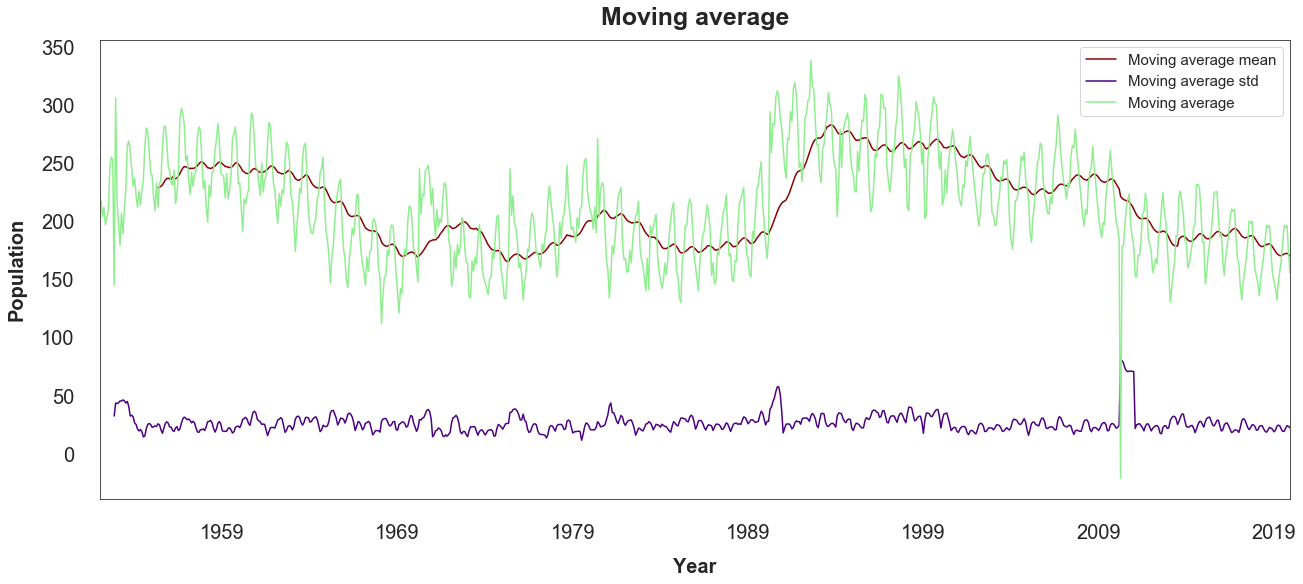

In [12]:
plt.figure(figsize = (20,10))
ma_mean = diff_fix.rolling(40).mean()
ma_mean.plot(label = 'Moving average mean', color = 'darkred')

ma_std = diff_fix.rolling(10).std()
ma_std.plot(label = 'Moving average std', color = 'indigo')

diff.plot(label = 'Moving average', color = 'lightgreen')

plt.rc('font', weight = 'normal')
plt.title('Moving average', weight = 'bold', fontsize = 25, pad= 15)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Population', weight = 'bold', fontsize = 20, labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10,)                                  
plt.tight_layout(pad = 5)                                               
plt.rc('font', size = 15)
plt.legend(loc = 'best', prop = {'size':15})
plt.show()

<div class="alert alert-block alert-info">
<b>Plot everything about moving average</b>
</div>

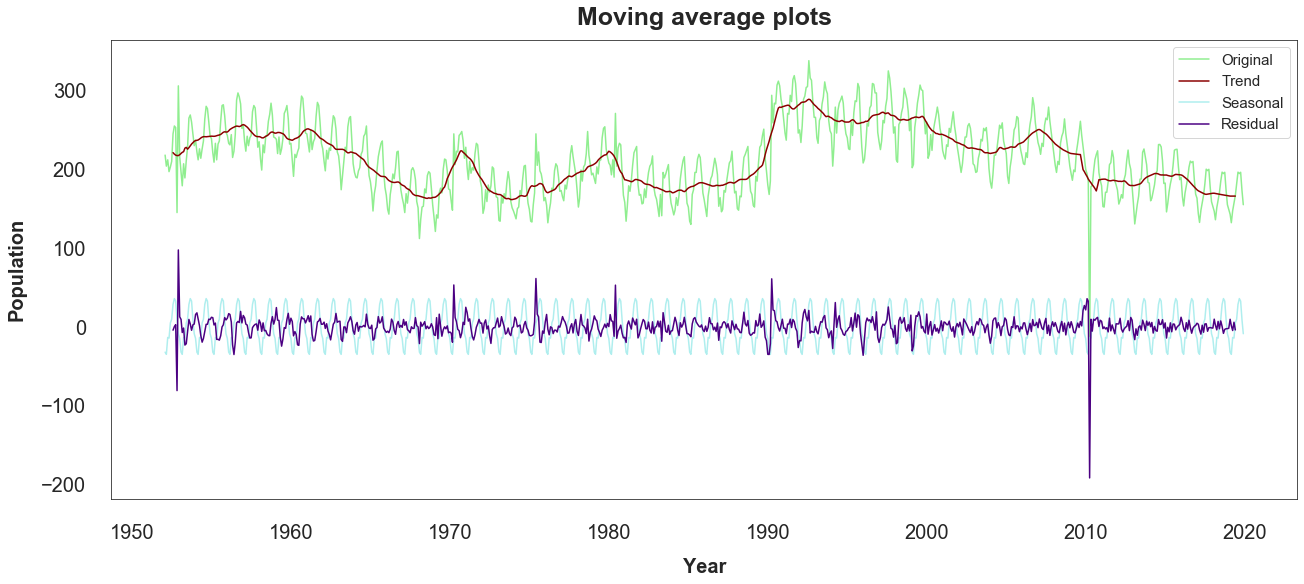

In [13]:
decomposition = seasonal_decompose(diff_fix)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize = (20,10))
plt.plot(diff_fix, label = 'Original', color = 'lightgreen')
plt.plot(trend, label = 'Trend', color = 'darkred')
plt.plot(seasonal, label = 'Seasonal', color = 'paleturquoise')
plt.plot(residual, label = 'Residual', color = 'indigo')
plt.rc('font', weight = 'normal')
plt.title('Moving average plots', weight = 'bold', fontsize = 25, pad= 15)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Population', weight = 'bold', fontsize = 20, labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10,)                                  
plt.tight_layout(pad = 5)                                               
plt.rc('font', size = 15)
plt.legend(loc = 'best', prop = {'size':15})
plt.show()

<div class="alert alert-block alert-info">
<b>Last year value</b>
</div>

In [14]:
df.tail(1)

,value
date,
2019-12-01,330309.946


<div class="alert alert-block alert-info">
<b>Building the ARIMA model and plottings about it</b>
</div>

Type P parameter you want: 1
Type D parameter you want: 1
Type Q parameter you want: 0
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  815
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3670.694
Method:                       css-mle   S.D. of innovations             21.848
Date:                Sun, 22 Mar 2020   AIC                           7347.389
Time:                        19:17:59   BIC                           7361.498
Sample:                             1   HQIC                          7352.804
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        213.0723      5.713     37.296      0.000     201.875     224.270
ar.L1.D.y      0.8671      0.017     49.871 

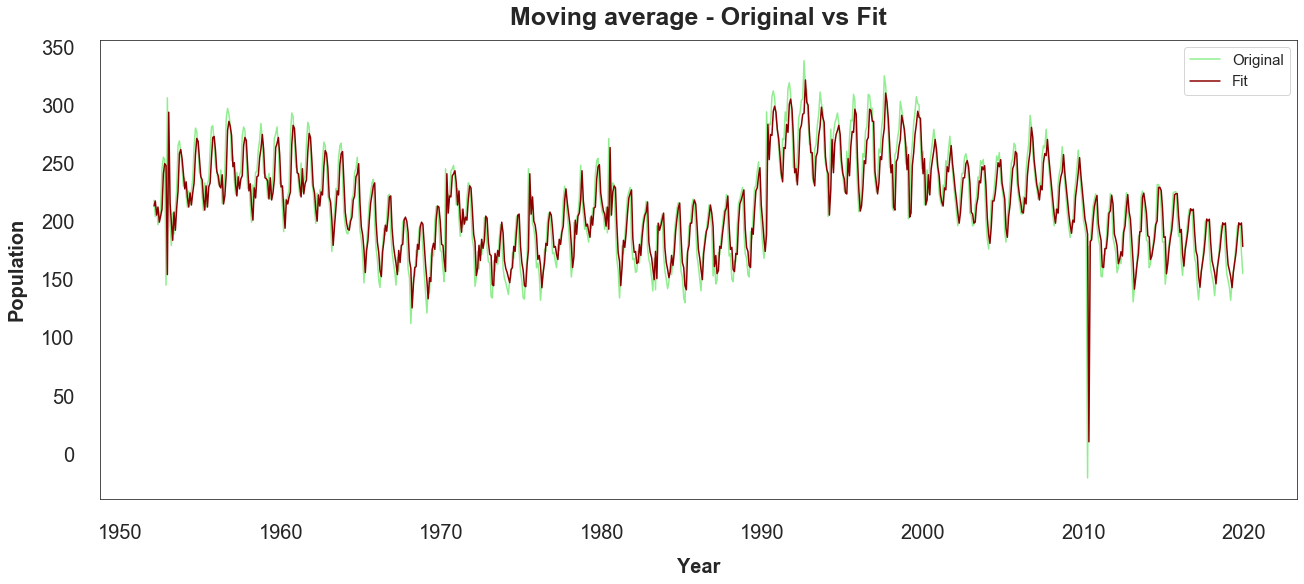

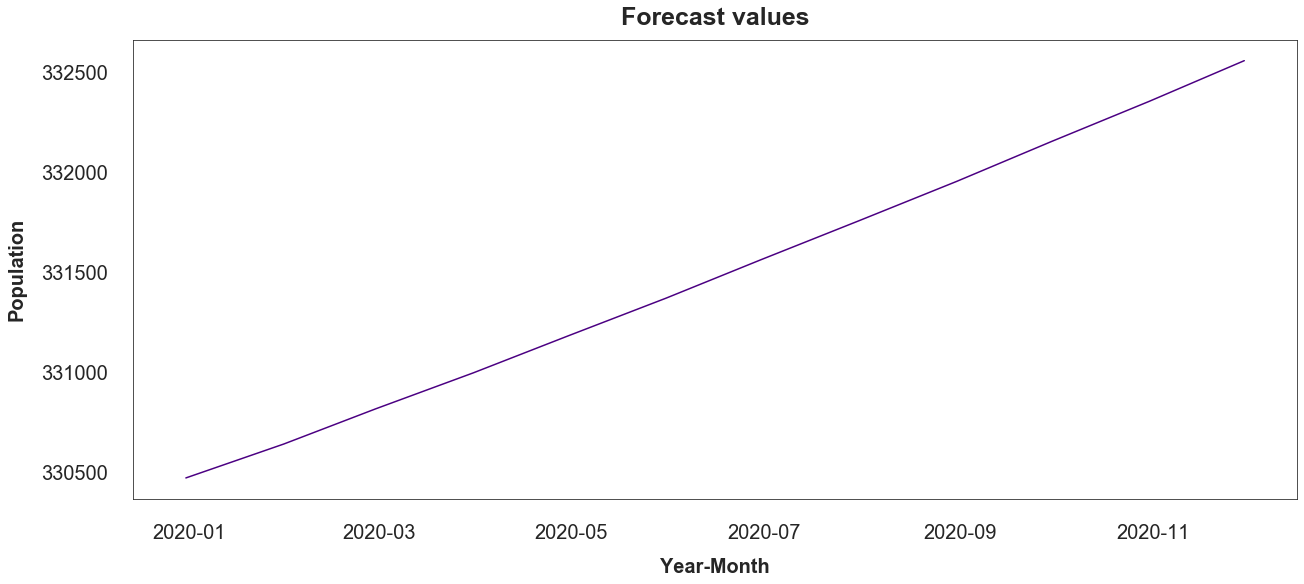

[330472.66166597 330642.07012634 330817.28185594 330997.52555455
 331182.13243379 331370.52259256 331562.19320317 331756.7082677
 331953.6897358  332152.80980298 332353.78423255 332556.36656515]
DatetimeIndex(['2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30'],
              dtype='datetime64[ns]', freq='M')


In [15]:
P = int(input("Type P parameter you want: "))
D = int(input("Type D parameter you want: "))
Q = int(input("Type Q parameter you want: "))

model = ARIMA(df['value'].values, order = (P, D, Q))
model_fit = model.fit()
print(model_fit.summary())
prediction = model_fit.forecast(12)[0]

plt.figure(figsize = (20,10))
plt.plot(diff_fix, label = 'Original', color = 'lightgreen')
plt.plot(df.index[1:], model_fit.fittedvalues[0:], label = 'Fit', color = 'darkred')
plt.rc('font', weight = 'normal')
plt.title('Moving average - Original vs Fit', weight = 'bold', fontsize = 25, pad= 15)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Population', weight = 'bold', fontsize = 20, labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10,)                                  
plt.tight_layout(pad = 5)                                               
plt.rc('font', size = 15)
plt.legend(loc = 'best', prop = {'size':15})
plt.show()

plt.figure(figsize = (20,10))
date = pd.date_range(start='2019-12', end='2020-12', freq='M')
plt.plot(date, prediction, color = 'indigo')
plt.rc('font', weight = 'normal')
plt.title('Forecast values', weight = 'bold', fontsize = 25, pad= 15)
plt.xlabel('Year-Month', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Population', weight = 'bold', fontsize = 20, labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10,)                                  
plt.tight_layout(pad = 5)                                               
plt.rc('font', size = 15)
plt.show()

print(prediction)
print(date)